# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

### My hypotheses
1. Applicants having a credit history are more likely to get a loan
2. Applicants who are married result in combined income and thus more likely to get a loan
3. Applicants with a higher education are more likely to get a loan

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("data.csv") 
ogdf = pd.read_csv('data.csv')
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [2]:
#Change credit history to be categorical
df['Credit_History'] = df.Credit_History.replace(to_replace=[0.0,1.0], value=['No','Yes'],)

In [3]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,Yes,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Yes,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Yes,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [4]:
# missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


Look at some basic statistics for numerical variables.

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']].nunique()

Loan_ID          614
Gender             2
Married            2
Dependents         4
Education          2
Self_Employed      2
Property_Area      3
Loan_Status        2
dtype: int64

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [8]:
# df['Gender'].value_counts()
# df['Married'].value_counts()
# df['Dependents'].value_counts()
# df['Education'].value_counts()
# df['Self_Employed'].value_counts()
#df['Property_Area'].value_counts()
df['Loan_Status'].value_counts()



Y    422
N    192
Name: Loan_Status, dtype: int64

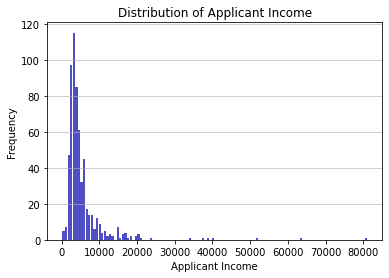

In [9]:
n, bins, patches = plt.hist(df['ApplicantIncome'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Distribution of Applicant Income')
maxfreq = n.max()

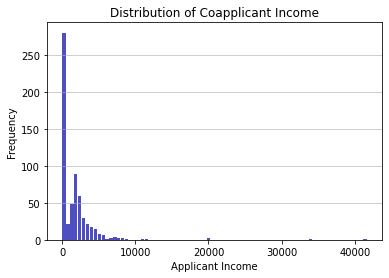

In [10]:
n, bins, patches = plt.hist(df['CoapplicantIncome'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Distribution of Coapplicant Income')
maxfreq = n.max()

In [11]:
# skewness along the index axis
df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']].skew(axis = 0, skipna = True)

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
dtype: float64

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



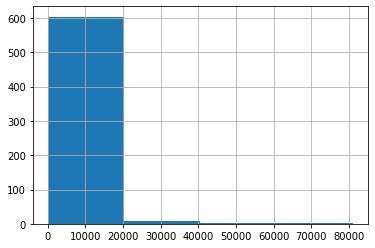

In [12]:
df['ApplicantIncome'].hist(bins=4)


Look at box plots to understand the distributions. 

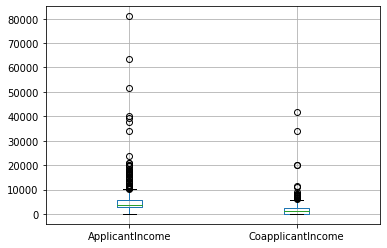

In [13]:
df.boxplot(column=['ApplicantIncome','CoapplicantIncome'])

Look at the distribution of income segregated  by `Education`

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc59bd0ad90>,
      dtype=object)

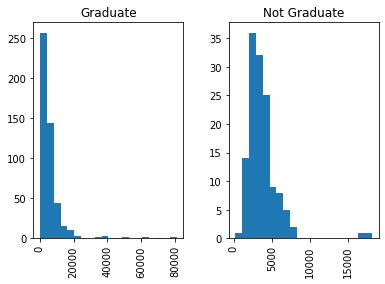

In [14]:
df.hist(column='ApplicantIncome', by = 'Education', bins = 20)

Look at the histogram and boxplot of LoanAmount

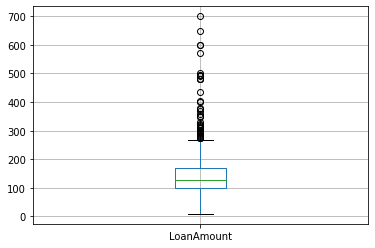

In [15]:
df.boxplot(column='LoanAmount')

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [16]:
# Credit History and Loan Status
pd.crosstab(df ['Credit_History'], df ['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
No,82,7,89
Yes,97,378,475
All,179,385,564


In [17]:
#Function to output percentage row wise in a cross table
def percentageConvert(ser):
    return ser/float(ser[-1])
# Loan approval rate for customers having Credit_History (1)
creditdf=pd.crosstab(df ["Credit_History"], df ["Loan_Status"], margins=True).apply(percentageConvert, axis=1)
loan_approval_with_Credit_1 = creditdf['Y'][1]
print(loan_approval_with_Credit_1*100)

79.57894736842105


In [18]:
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,Yes,Urban,Y


In [19]:
# Marital Status and Loan Status
pd.crosstab(df ['Married'], df ['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Married,,,
No,79,134,213
Yes,113,285,398
All,192,419,611


In [20]:
marrieddf=pd.crosstab(df ["Married"], df ["Loan_Status"], margins=True).apply(percentageConvert, axis=1)
loan_approval_with_Marriage_1 = marrieddf['Y'][1]
print(loan_approval_with_Marriage_1*100)

71.60804020100502


In [21]:
#Education and Loan Status
pd.crosstab(df ['Education'], df ['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Education,,,
Graduate,140,340,480
Not Graduate,52,82,134
All,192,422,614


In [22]:
Educationdf=pd.crosstab(df ["Education"], df ["Loan_Status"], margins=True).apply(percentageConvert, axis=1)
loan_approval_with_Education_1 = Educationdf['Y'][0]
print(loan_approval_with_Education_1*100)

70.83333333333334


In [23]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878
LoanAmount,0.570909,0.188619,1.000000,0.039447
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000


## Split Train Test Data

In [24]:
# creating target variable
y = df["Loan_Status"]
df = df.drop(["Loan_Status","Loan_ID"],axis = 1)

In [25]:
df_train = df.sample(frac=0.8).sort_index()
y_train = y[y.index.isin(df_train.index.tolist())]

In [26]:
df_test = df[~df.index.isin(df_train.index.tolist())].sort_index()
y_test = y[y.index.isin(df_test.index.tolist())]

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Splitting into numerical and categorical features


In [27]:
cat_feats = df.dtypes[df.dtypes == 'object'].index.tolist()
num_feats = df.dtypes[~df.dtypes.index.isin(cat_feats)].index.tolist()

In [28]:
from sklearn.preprocessing import FunctionTransformer

# Using own function in Pipeline
def numFeat(data):
    return data[num_feats]

def catFeat(data):
    return data[cat_feats]

In [29]:
# we will start two separate pipelines for each type of features
keep_num = FunctionTransformer(numFeat)
keep_cat = FunctionTransformer(catFeat)

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [30]:
from sklearn.impute import SimpleImputer

In [31]:
# Use SimpleImputer PIPELINE
null_replace_num = SimpleImputer(strategy="mean")
null_replace_cat = SimpleImputer(strategy="most_frequent")

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

In [32]:
# ogdf.hist(column='LoanAmount',bins =20)

In [33]:
# ogdf['LoanAmount_log'] = ogdf['LoanAmount'].map(lambda x: np.log1p(x))
# ogdf.hist(column='LoanAmount_log', bins = 20)

In [34]:
#PIPELINED
from sklearn.compose import ColumnTransformer


In [50]:
#UDF FOR PIPELINE
def log_loan(data):
  data['log_loan'] = np.log1p(data['LoanAmount'])
  #data['LoanAmount_log'] = data['LoanAmount'].map(lambda x: np.log1p(x))
  #data.loc[:,"LoanAmount"] = np.log(data.LoanAmount)
  return data


In [51]:
log_loan_transformer = FunctionTransformer(log_loan)

#column_transformer = ColumnTransformer(['logloan',log_loan_transformer,ogdf.LoanAmount])

Combine both incomes as total income and take a log transformation of the same.

In [ ]:
# # Add both ApplicantIncome and CoapplicantIncome to TotalIncome
# ogdf['TotalIncome'] = ogdf['ApplicantIncome'] + ogdf['CoapplicantIncome']

# ogdf['TotalIncome_log'] = ogdf['TotalIncome'].map(lambda x: np.log1p(x))

In [41]:
#UDF FOR PIPELINE
def TotalIncomeLog(data):
  data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']
  data['TotalIncome_log'] = data['TotalIncome'].map(lambda x: np.log1p(x))
  return data

In [42]:
total_income_transformer = FunctionTransformer(TotalIncomeLog)

## 4. Building a Predictive Model

In [43]:
# Use selectKbest for feature selection, quite redundant with random forest and also we only have 4 numeric features but what the heck.
from sklearn.feature_selection import SelectKBest
k_best = SelectKBest(k=3)

In [44]:
# Instantiate the one hot encoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [45]:
# Instantiate standard scalar
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

base_model = LogisticRegression()
RandomForest_model = RandomForestClassifier()
GradientBoosting_model = GradientBoostingClassifier()

In [47]:
from sklearn.pipeline import Pipeline, FeatureUnion

In [66]:
num_pipeline = Pipeline(
    [
        ("num_feats", keep_num), 
        ("impute_num", null_replace_num),
        #("log_load", log_loan_transformer),
        #("log_income", total_income_transformer),
        ("scaler", sc),
        ("kBest", k_best)
    ]
)

cat_pipeline = Pipeline(
    [
        ("cat_feats", keep_cat), 
        ("impute_cat", null_replace_cat),
        ("dummies", ohe),
    ]
)

all_features = FeatureUnion(
    [
        ("numeric_features", num_pipeline),
        ("categorical_features", cat_pipeline),
    ]
)

main_pipeline = Pipeline(
    [
        ("all_features", all_features),
        ("modeling", GradientBoosting_model)
]
)

In [67]:
model = main_pipeline.fit(df_train, y_train)
model.score(df_train,y_train)

0.8839103869653768

In [68]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(df_test)

accuracy_score(y_test,y_pred)

0.8130081300813008

Try paramater grid search to improve the results

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.859812,4.859812
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.204693,4.204693
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.795791,4.795791
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.955827,4.955827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,4.276666,4.276666
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,3.713572,3.713572
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,5.537334,5.537334
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,5.236442,5.236442


## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python